In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as numpy

In [3]:
df = pd.read_csv('Wholesale_Data.csv')

In [4]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


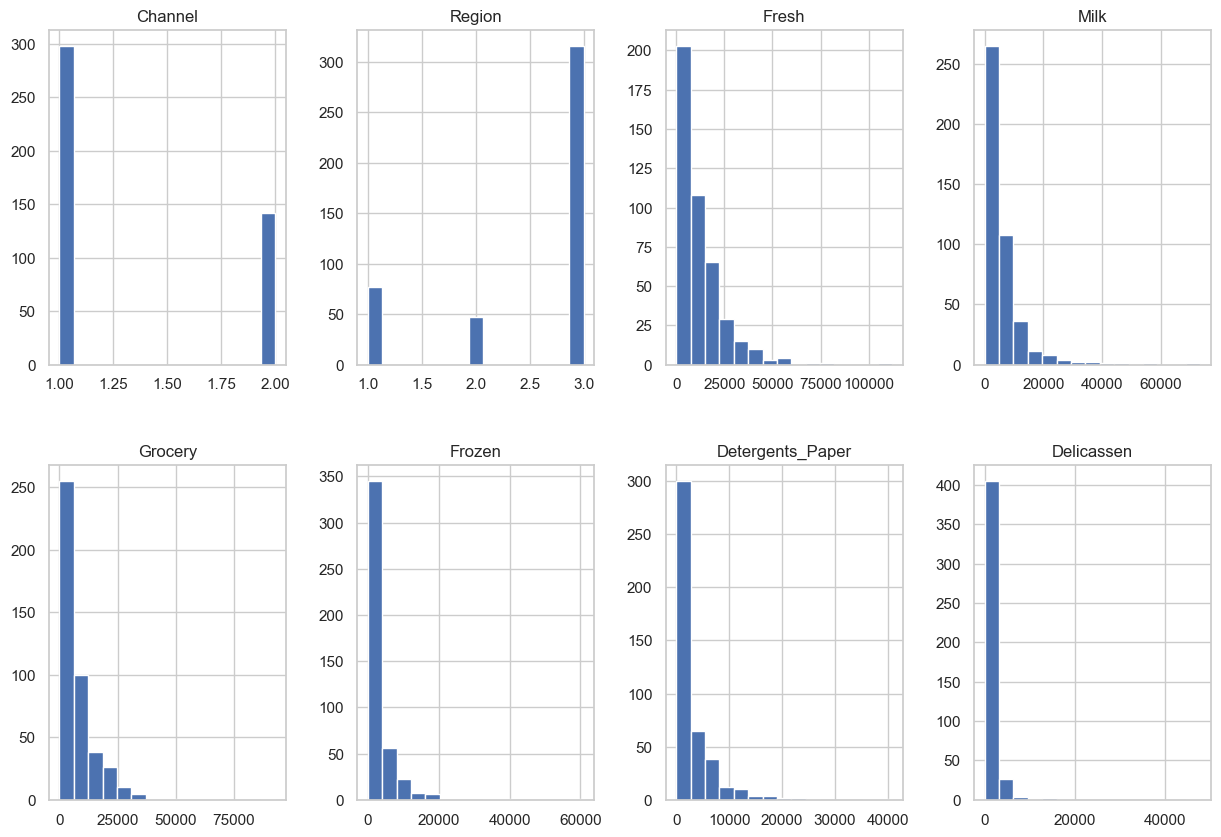

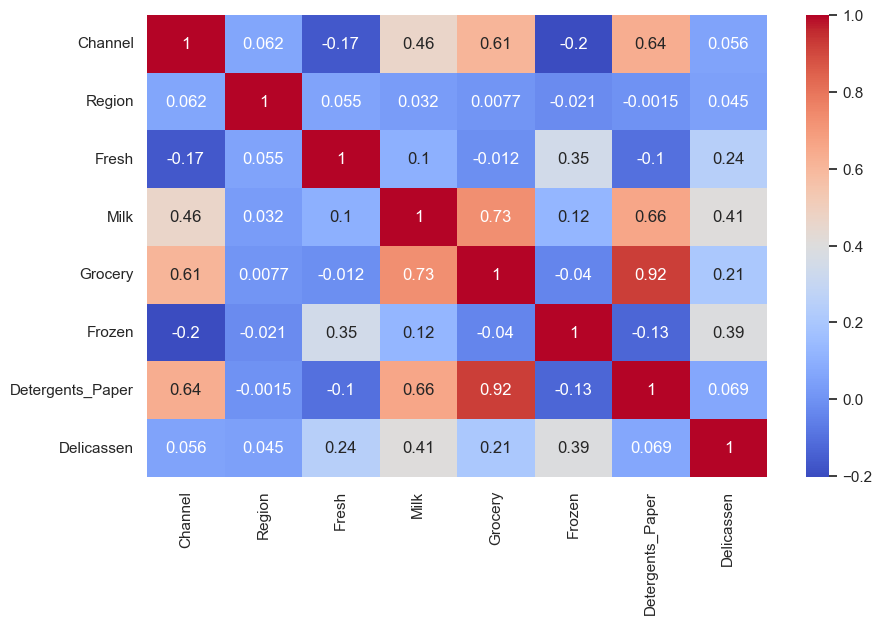

In [5]:
# null check
missing_values = df.isnull().sum()

#summary stats
summary_statistics = df.describe()

missing_values, summary_statistics

sns.set(style="whitegrid")
# Histograms
df.hist(bins=15, figsize=(15, 10), layout=(2, 4))

# Correlheat
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()



Axes(0.125,0.11;0.775x0.77)


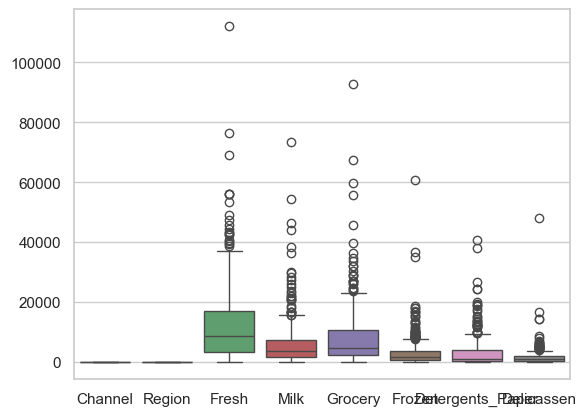

In [6]:
print(sns.boxplot(data=df))

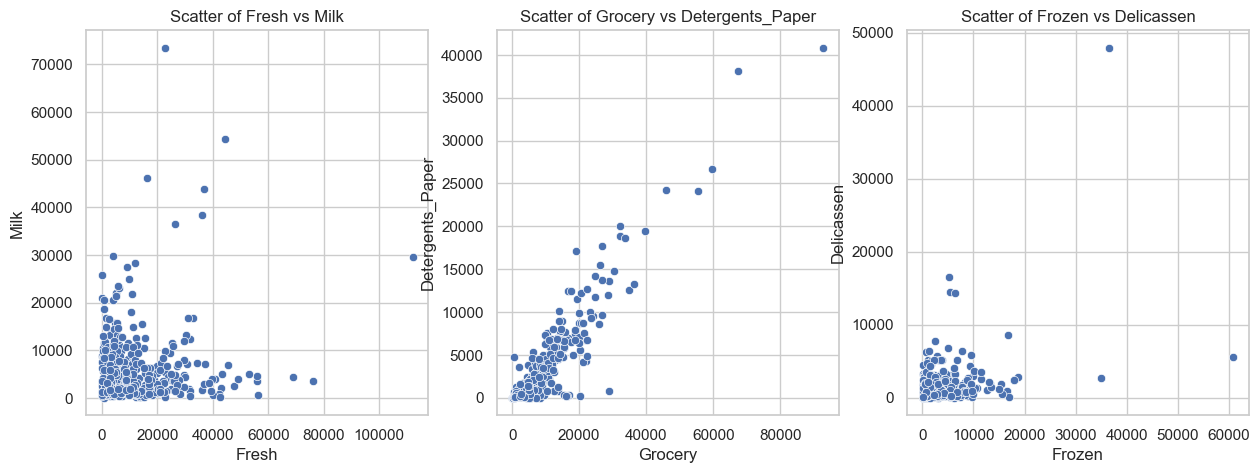

In [7]:
# Convert string data to pandas DataFrame
# df = pd.read_csv(StringIO(data))

# Creating scatter plots for a few selected pairs of variables
pair_columns = [('Fresh', 'Milk'), ('Grocery', 'Detergents_Paper'), ('Frozen', 'Delicassen')]

plt.figure(figsize=(15, 5))
for i, (col1, col2) in enumerate(pair_columns, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[col1], y=df[col2])
    plt.title(f'Scatter of {col1} vs {col2}')

plt.show()

In [8]:
#Calculating IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#outliers
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outlier_counts = outliers.sum().drop(['Channel', 'Region'])

outlier_counts

Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

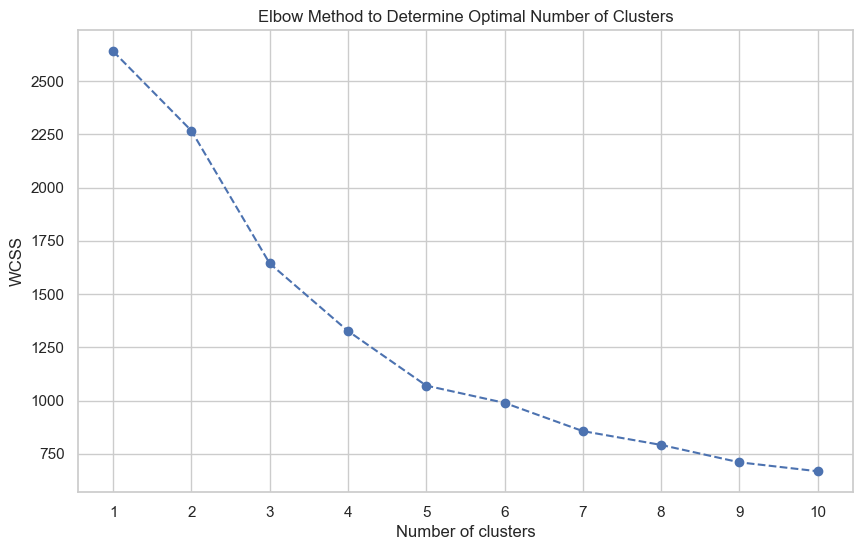

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Data Preprocessing: Standardizing the dataset
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop(columns=['Channel', 'Region']))

# Determining the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()



In [10]:

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop(columns=['Channel', 'Region']))

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(scaled_df)

df['Cluster'] = kmeans.labels_

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,1


In [11]:
# Calculating the centroids of each cluster
cluster_centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                                 columns=df.columns[2:-1])

# Counting the number of data points in each cluster
cluster_sizes = df['Cluster'].value_counts().sort_index()

cluster_centroids, cluster_sizes


(          Fresh          Milk       Grocery        Frozen  Detergents_Paper  \
 0   5509.250000  10555.635417  16477.927083   1420.125000       7199.406250   
 1  34188.627119   4850.576271   5870.000000   7215.559322        955.847458   
 2  16911.090909  34864.363636  46126.181818   3245.454545      23008.090909   
 3   9112.235294   2965.404412   3783.702206   2413.591912        976.908088   
 4  34782.000000  30367.000000  16898.000000  48701.500000        755.500000   
 
      Delicassen  
 0   1658.791667  
 1   2491.796610  
 2   4177.363636  
 3    974.926471  
 4  26776.000000  ,
 Cluster
 0     96
 1     59
 2     11
 3    272
 4      2
 Name: count, dtype: int64)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.b

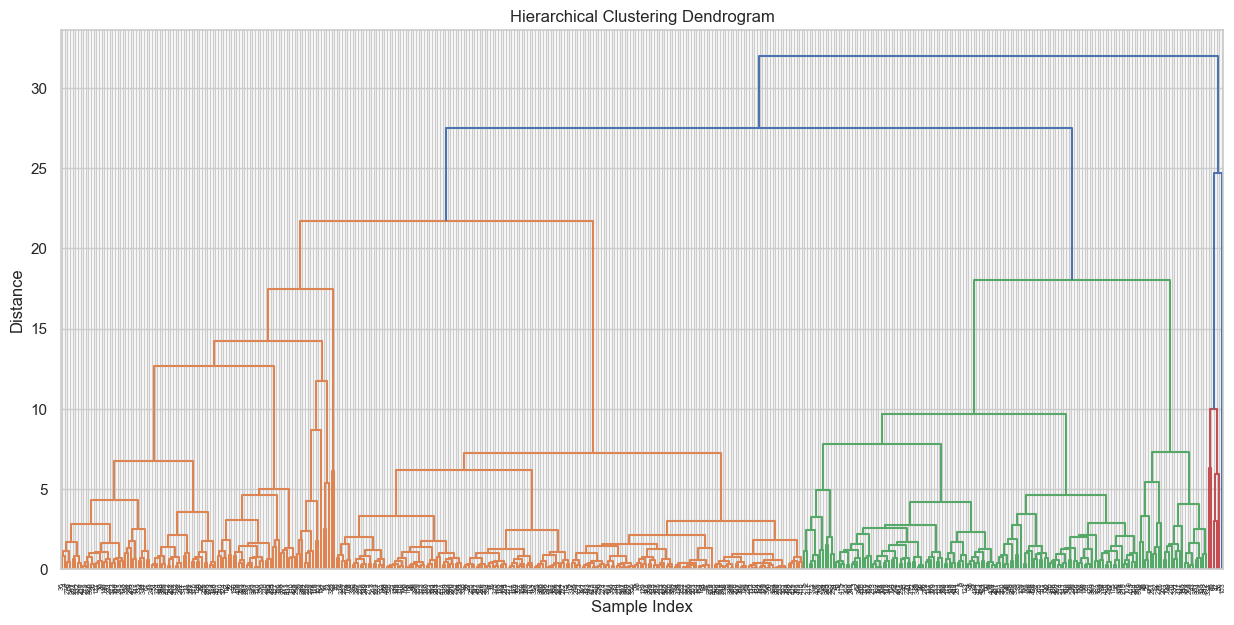

In [12]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Ensuring the data is standardized
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop(columns=['Channel', 'Region', 'Cluster']))

# Performing hierarchical clustering
linked = linkage(scaled_df, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



In [13]:
from scipy.cluster.hierarchy import fcluster

# Determine the number of clusters
distance_threshold = 5
clusters = fcluster(linked, distance_threshold, criterion='distance')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,Hierarchical_Cluster
0,2,3,12669,9656,7561,214,2674,1338,3,10
1,2,3,7057,9810,9568,1762,3293,1776,0,10
2,2,3,6353,8808,7684,2405,3516,7844,0,11
3,1,3,13265,1196,4221,6404,507,1788,3,14
4,2,3,22615,5410,7198,3915,1777,5185,1,23


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [14]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop(columns=['Channel', 'Region', 'Hierarchical_Cluster']))

# Applying PCA
pca = PCA()
pca.fit(scaled_df)

pca_components = pca.components_
explained_variance = pca.explained_variance_ratio_


pca_loadings = pd.DataFrame(pca_components, columns=df.columns[2:-1])
pca_loadings, explained_variance


(      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
 0  0.046814  0.499124  0.547259  0.030255          0.520113    0.208182   
 1  0.521349  0.111180 -0.119371  0.613173         -0.229394    0.519060   
 2 -0.631371  0.213439  0.052871  0.102678          0.040290    0.428407   
 3  0.549485  0.183998  0.165923 -0.284558          0.187248   -0.213474   
 4 -0.140059 -0.047562  0.140756  0.728550          0.212200   -0.600594   
 5 -0.068676  0.809568 -0.330367 -0.023217         -0.361808   -0.302882   
 6 -0.033268 -0.037942  0.725932 -0.016247         -0.681353   -0.075385   
 
     Cluster  
 0 -0.366632  
 1  0.059656  
 2  0.597763  
 3  0.689256  
 4  0.147589  
 5 -0.086939  
 6  0.016944  ,
 array([0.42073787, 0.24389294, 0.1217086 , 0.08395871, 0.08038529,
        0.04034834, 0.00896826]))

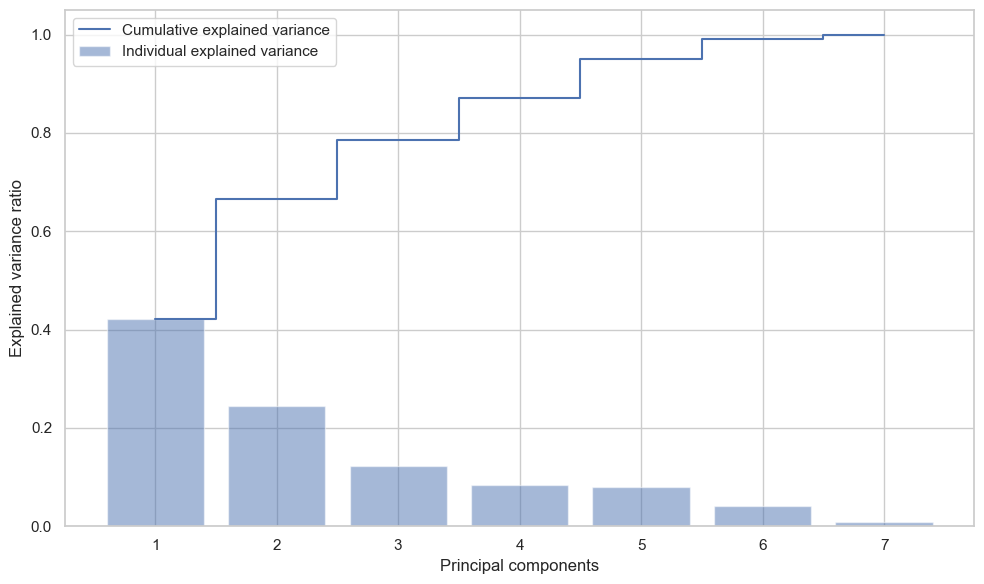

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.
1

#### 
PC1 Insight: 'Milk', 'Grocery', and 'Detergents_Paper' purchases scale together, dominating variance in customer spending.
PC2 Insight: A distinct customer segment emerges with a preference for 'Fresh' and 'Frozen' products, indicating a raw and unprocessed product focus.
Specialized Behavior: Customers show specialized preferences with 'Delicassen' versus 'Fresh' products (PC3) and 'Fresh' versus 'Frozen' products (PC4).
Segmentation Clarity: Clustering reveals distinct customer groups, informing targeted marketing and inventory management in the wholesale channel.
